In [130]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

In [105]:
def testC(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)
    bag = BaggingClassifier().fit(X_train, y_train)
    y_pred =  bag.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

def testR(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    lr = LinearRegression().fit(X_train, y_train)
    print(lr.score(X_test, y_test))

In [106]:
data_regression = pd.read_csv("../data/kc_house_data.csv").sample(15000)
data_classification = pd.read_csv("../data/card_transdata.csv").sample(15000)

In [78]:
data_classification['used_chip'] = data_classification['used_chip'].astype(int)
data_classification['repeat_retailer'] = data_classification['repeat_retailer'].astype(int)
data_classification['used_pin_number'] = data_classification['used_pin_number'].astype(int)
data_classification['online_order'] = data_classification['online_order'].astype(int)
data_classification['fraud'] = data_classification['fraud'].astype(int)

data_regression = data_regression.drop(["date","id"], axis = 1)

In [79]:
y_regression = data_regression["price"]

X_regression = data_regression.drop(columns = ['price'])
X_scaled = MinMaxScaler().fit_transform(X_regression)
X_regression = pd.DataFrame(X_scaled, columns=X_regression.columns)

y_classification = data_classification['fraud']

X_classification = data_classification.drop(columns = ['fraud'])
X_scaled = MinMaxScaler().fit_transform(X_classification)
X_classification = pd.DataFrame(X_scaled, columns=X_classification.columns)

In [80]:
testR(X_regression, y_regression)

0.6971404697900229


In [81]:
testC(X_classification, y_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       0.99      0.99      0.99       197

    accuracy                           1.00      2250
   macro avg       1.00      0.99      1.00      2250
weighted avg       1.00      1.00      1.00      2250

[[2052    1]
 [   2  195]]


In [82]:
X_regression.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.336673,0.263677,0.134735,0.008772,0.198853,0.007067,0.058017,0.602217,0.554533,0.164071,0.059941,0.616417,0.043243,0.390199,0.650955,0.253015,0.293738,0.013829
std,0.090430,0.096229,0.068942,0.025395,0.215979,0.083769,0.190807,0.162427,0.098154,0.090251,0.091489,0.256768,0.202385,0.269653,0.223109,0.117059,0.126022,0.030879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.187500,0.085283,0.002730,0.000000,0.000000,0.000000,0.500000,0.500000,0.098684,0.000000,0.443478,0.000000,0.161616,0.508284,0.156977,0.202374,0.005103
50%,0.300000,0.281250,0.122264,0.004292,0.200000,0.000000,0.000000,0.500000,0.500000,0.139254,0.000000,0.652174,0.000000,0.323232,0.670179,0.238372,0.265442,0.007982
75%,0.400000,0.312500,0.170566,0.006100,0.400000,0.000000,0.000000,0.750000,0.583333,0.210526,0.116183,0.843478,0.000000,0.590909,0.840759,0.327243,0.363754,0.010797
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
X_classification.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.011855,0.004101,0.022134,0.882467,0.350933,0.102200,0.649400
std,0.026951,0.017222,0.035975,0.322065,0.477278,0.302921,0.477174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001666,0.000253,0.005619,1.000000,0.000000,0.000000,0.000000
50%,0.004356,0.000831,0.011927,1.000000,0.000000,0.000000,1.000000
75%,0.011380,0.002806,0.025189,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Всё для классификации

In [94]:
vt = VarianceThreshold(0.15)
X_vt = vt.fit_transform(X_classification)
X_vt.shape

(15000, 2)

In [95]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head(5)

,used_chip,online_order
0,0.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,1.0


In [96]:
testC(X_vt, y_classification)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2053
           1       0.00      0.00      0.00       197

    accuracy                           0.91      2250
   macro avg       0.46      0.50      0.48      2250
weighted avg       0.83      0.91      0.87      2250

[[2053    0]
 [ 197    0]]


C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Зато осталось всего 2 признака))))

In [110]:
skb = SelectKBest(k=2)
X_skb = skb.fit_transform(X_classification, y_classification)
X_skb.shape

(15000, 2)

In [111]:
testC(X_skb, y_classification)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2053
           1       0.59      0.45      0.51       197

    accuracy                           0.92      2250
   macro avg       0.77      0.71      0.74      2250
weighted avg       0.92      0.92      0.92      2250

[[1992   61]
 [ 108   89]]


ну тут получше))))

In [117]:
tree = DecisionTreeClassifier().fit(X_classification, y_classification)

In [118]:
rfe = RFE(estimator=tree, n_features_to_select=2, step=1).fit(X_classification, y_classification)
X_rfe = pd.DataFrame(rfe.transform(X_classification), columns=rfe.get_feature_names_out())
X_rfe

,distance_from_home,ratio_to_median_purchase_price
0,0.003807,0.009027
1,0.001800,0.005977
2,0.003409,0.005356
3,0.012090,0.009866
4,0.002259,0.025581
...,...,...
14995,0.033102,0.004168
14996,0.000762,0.053419
14997,0.052735,0.009036
14998,0.018310,0.025115


In [120]:
testC(X_rfe, y_classification)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2053
           1       0.60      0.53      0.56       197

    accuracy                           0.93      2250
   macro avg       0.78      0.75      0.76      2250
weighted avg       0.92      0.93      0.93      2250

[[1982   71]
 [  92  105]]


+-как предыдущая модель

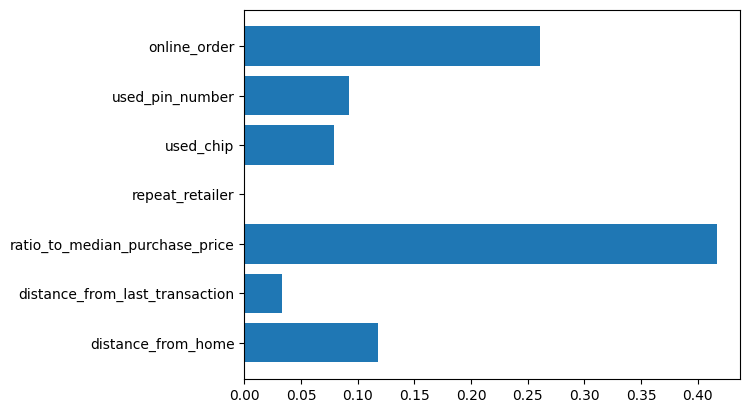

In [122]:
plt.barh(width=tree.feature_importances_, y=X_classification.columns);

По приколу посмотрели на значимость признаков

In [125]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_classification, y_classification)
X_pca.shape

(15000, 2)

In [126]:
sum(pca.explained_variance_ratio_)

0.6972439301960633

сохранили 70 процентов инфы, при этом датасет уменьшился в многамнога раз. Ура, товарисчи!

In [128]:
test(X_pca, y_classification)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2051
           1       0.94      0.91      0.92       199

    accuracy                           0.99      2250
   macro avg       0.96      0.95      0.96      2250
weighted avg       0.99      0.99      0.99      2250



УАУАУАУАУАУАУАУАУАУАУАУАУАУАУУ, НА РАДОСТЯХ НАРИСУЮ ГРАФИК

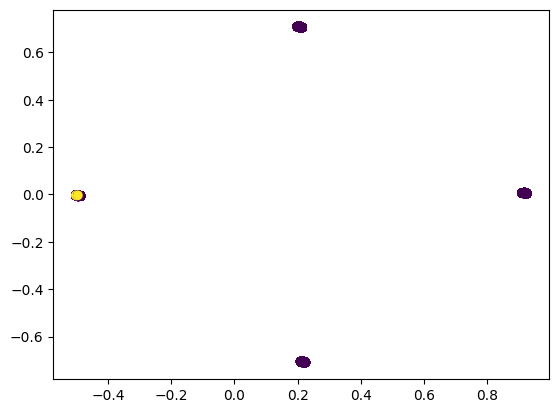

In [129]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_classification);

мне страшно, давайте дальше

In [131]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_classification)

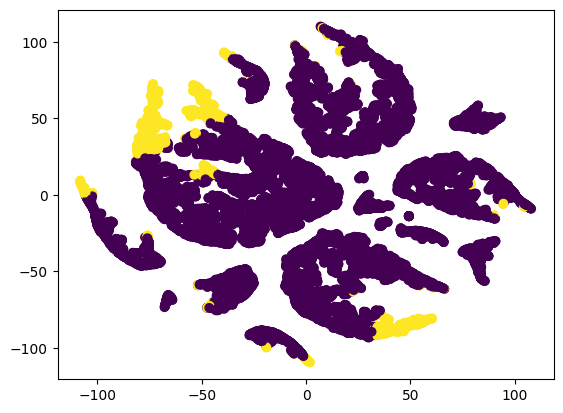

In [132]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_classification);

In [134]:
testC(X_tsne, y_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       0.98      0.96      0.97       197

    accuracy                           1.00      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       1.00      1.00      1.00      2250

[[2049    4]
 [   7  190]]


Девочки, я в шоке....

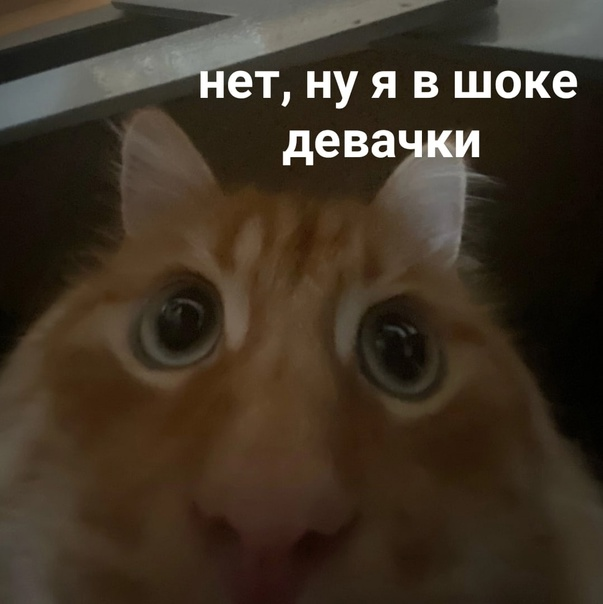

In [135]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_classification)

C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 16 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.fla

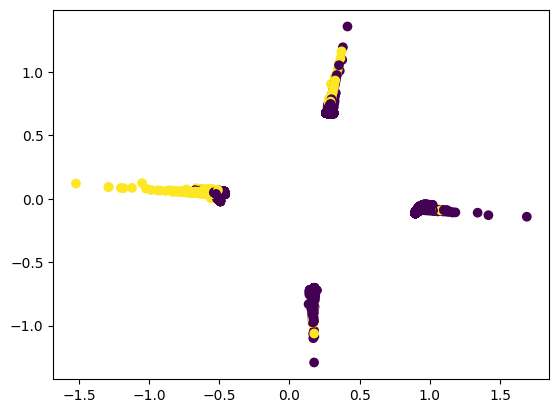

In [136]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y_classification);

In [137]:
testC(X_isomap, y_classification)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2053
           1       0.92      0.87      0.90       197

    accuracy                           0.98      2250
   macro avg       0.96      0.93      0.94      2250
weighted avg       0.98      0.98      0.98      2250

[[2039   14]
 [  25  172]]


После прошлого я уже не удивлён.

## С довольным лицом сделаем всё то же самое для регрессии))))))

In [144]:
vt = VarianceThreshold(0.05)
X_vt = vt.fit_transform(X_regression)
X_vt.shape

(15000, 2)

In [145]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head(5)

,yr_built,zipcode
0,0.860870,0.272727
1,0.600000,0.257576
2,0.217391,0.833333
3,0.686957,0.575758
4,0.600000,0.292929


In [147]:
testR(X_vt, y_regression)

0.004921164238122389


In [148]:
skb = SelectKBest(k=2)
X_skb = skb.fit_transform(X_regression, y_regression)
X_skb.shape

(15000, 2)

In [150]:
testR(X_skb, y_regression)

0.5356280044309772


In [151]:
tree = DecisionTreeClassifier().fit(X_regression, y_regression)

In [152]:
rfe = RFE(estimator=tree, n_features_to_select=2, step=1).fit(X_regression, y_regression)
X_rfe = pd.DataFrame(rfe.transform(X_regression), columns=rfe.get_feature_names_out())
X_rfe

,sqft_lot,lat
0,0.004410,0.471771
1,0.004804,0.833360
2,0.004083,0.504102
3,0.002714,0.838507
4,0.006772,0.505549
...,...,...
14995,0.019021,0.674119
14996,0.021211,0.794756
14997,0.004059,0.547370
14998,0.002350,0.620235


In [153]:
testR(X_rfe, y_regression)

0.10781636551589713


In [154]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_regression, y_regression)
X_pca.shape

(15000, 2)

In [155]:
sum(pca.explained_variance_ratio_)

0.46528989850353525

тут уже печальней, но всё равно окээээй

In [156]:
testR(X_pca, y_regression)

0.20734311738287248


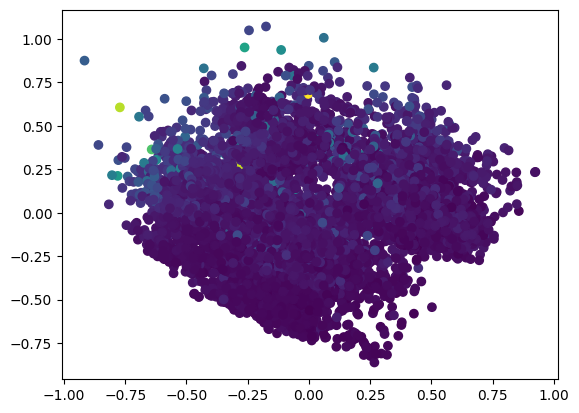

In [157]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_regression);

In [158]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_regression)

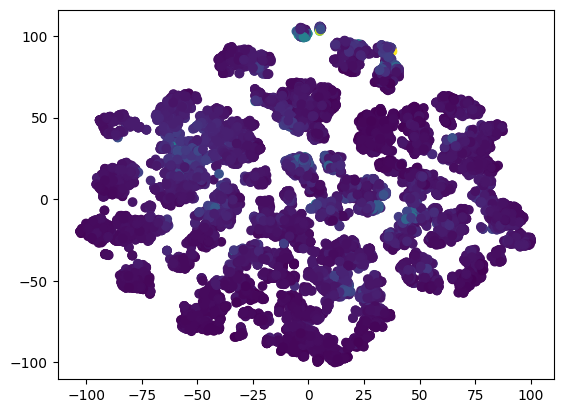

In [159]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_regression);

In [161]:
testR(X_tsne, y_regression)

0.06387857131873542


In [160]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_regression)

C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat

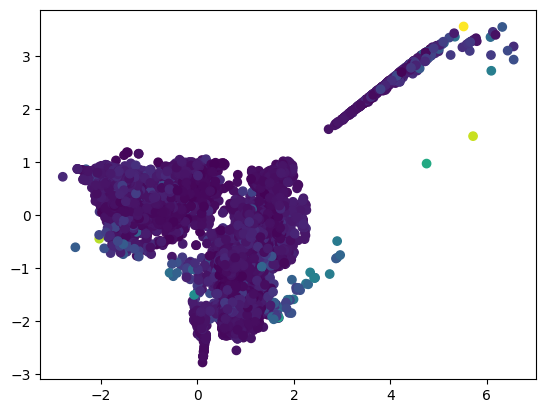

In [162]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y_regression);

In [163]:
testR(X_isomap, y_regression)

0.008186896803864196


нууууу, нелинейные методы и линейная регрессия не дружат)
SelectKBest справился лучше всех

Реализация будет после нг. чееееестно

## PCA

In [166]:
class myPCA:
    def __init__(self, n_components = 2):
        self.n_components = n_components

    def fit_transform(self, X):
        covmat = np.cov(X)
        _, vecs = np.linalg.eig(covmat)
        v = -vecs[:,1]
        Xnew = dot(v,X)
        return Xnew

In [ ]:
mypcaX = myPCA(2).fit_transform(X_classification)
mypcaX

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_classification);

In [ ]:
plt.scatter(mypcaX[:,0], mypcaX[:,1], c=y_classification);